In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:\\PG-DBDA\\PML\\creditcard.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#Check for Null Values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.describe().round()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,...,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0
mean,94814.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,88.0,0.0
std,47488.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,250.0,0.0
min,0.0,-56.0,-73.0,-48.0,-6.0,-114.0,-26.0,-44.0,-73.0,-13.0,...,-35.0,-11.0,-45.0,-3.0,-10.0,-3.0,-23.0,-15.0,0.0,0.0
25%,54202.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,...,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.0,0.0
50%,84692.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,22.0,0.0
75%,139320.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0
max,172792.0,2.0,22.0,9.0,17.0,35.0,73.0,121.0,20.0,16.0,...,27.0,11.0,23.0,5.0,8.0,4.0,32.0,34.0,25691.0,1.0


In [6]:
print ('Not Fraud % ',round(df['Class'].value_counts()[0]/len(df)*100,2))
print ()
print (round(df.Amount[df.Class == 0].describe(),2))
print ()
print ()
print ('Fraud %    ',round(df['Class'].value_counts()[1]/len(df)*100,2))
print ()
print (round(df.Amount[df.Class == 1].describe(),2))

Not Fraud %  99.83

count    284315.00
mean         88.29
std         250.11
min           0.00
25%           5.65
50%          22.00
75%          77.05
max       25691.16
Name: Amount, dtype: float64


Fraud %     0.17

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64


In [7]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30:].columns

data_features = df[feature_names]
data_target = df[target]

In [8]:
feature_names

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, 
                                                    train_size = 0.70, test_size = 0.30, random_state = 1)

# Building the Regression Logistic model

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Training the model

In [11]:
lr.fit(X_train, y_train)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Confusion Matrix - Model performance measures

In [12]:
def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

In [13]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred

# Classification Report - Model performance measure

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt

In [15]:
cmat, pred = RunModel(lr, X_train, y_train, X_test, y_test)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
accuracy_score(y_test, pred)

0.9991573329588147

In [17]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.84      0.58      0.68       135

    accuracy                           1.00     85443
   macro avg       0.92      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443



# Applying the undersampling technique¶

In [18]:
# The function "len" counts the number of classes = 1 and saves it as an object "fraud_records"
fraud_records = len(df[df.Class == 1])

# Defines the index for fraud and non-fraud in the lines:
fraud_indices = df[df.Class == 1].index
not_fraud_indices = df[df.Class == 0].index

# Randomly collect equal samples of each type:
under_sample_indices = np.random.choice(not_fraud_indices, fraud_records, False)
df_undersampled = df.iloc[np.concatenate([fraud_indices, under_sample_indices]),:]
X_undersampled = df_undersampled.iloc[:,1:30]
Y_undersampled = df_undersampled.Class
X_undersampled_train, X_undersampled_test, Y_undersampled_train, Y_undersampled_test = train_test_split(X_undersampled, Y_undersampled, test_size = 0.30)

# Using the "new" classifier for balanced data

In [19]:
lr_undersampled = LogisticRegression()
cmat, pred = RunModel(lr_undersampled, X_undersampled_train, Y_undersampled_train, X_undersampled_test, Y_undersampled_test)
PrintStats(cmat, Y_undersampled_test, pred)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
accuracy_score(Y_undersampled_test, pred)

0.9324324324324325

In [21]:
print (classification_report(Y_undersampled_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       143
           1       0.95      0.92      0.93       153

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



# Using the "new" classifier for the original data test

In [29]:
lr_undersampled = LogisticRegression()
cmat, pred = RunModel(lr_undersampled, X_undersampled_train, Y_undersampled_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

2023-01-29 00:22:41,432 [5876] WARNING  py.warnings:109: [JupyterRequire] C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

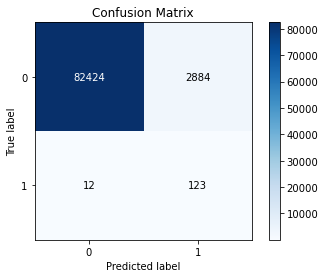

In [30]:
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [31]:
accuracy_score(y_test, pred)

0.9661060590101003

In [32]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85308
           1       0.04      0.91      0.08       135

    accuracy                           0.97     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.97      0.98     85443



# GridSearchCV - Parameter optimization

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [1,2,3,4,5,6,7,8,9,10], 
              "penalty": ['l1','l2']} #Parameters
            
grid_search = GridSearchCV(lr, param_grid, scoring="precision") #score
grid_search.fit(y_test, pred)

lr = grid_search.best_estimator_ 
grid_search.best_params_, grid_search.best_score_

2023-01-29 00:24:43,057 [5876] WARNING  py.warnings:109: [JupyterRequire] C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\

({'C': 1, 'penalty': 'l2'}, 0.9128655452493535)

In [34]:
lr = LogisticRegression(C=1, penalty='l2')
cmat, pred = RunModel(lr, X_undersampled_train, Y_undersampled_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

2023-01-29 00:25:30,120 [5876] WARNING  py.warnings:109: [JupyterRequire] C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

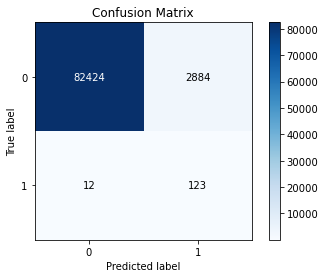

In [35]:
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [36]:
accuracy_score(y_test, pred)

0.9661060590101003

In [37]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85308
           1       0.04      0.91      0.08       135

    accuracy                           0.97     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.97      0.98     85443



##Application of the Model with balanced data and parameter optimization

In [39]:
r_undersampled = LogisticRegression(C=1, penalty='l2')
cmat, pred = RunModel(lr_undersampled, X_undersampled_train, Y_undersampled_train, X_undersampled_test, Y_undersampled_test)
PrintStats(cmat, Y_undersampled_test, pred)

2023-01-29 00:27:46,437 [5876] WARNING  py.warnings:109: [JupyterRequire] C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

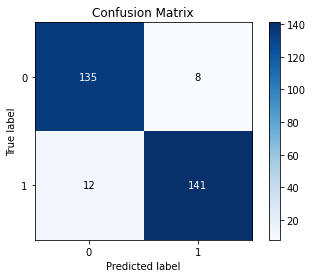

In [40]:
skplt.metrics.plot_confusion_matrix(Y_undersampled_test, pred)

In [41]:
accuracy_score(Y_undersampled_test, pred)

0.9324324324324325

In [42]:
print (classification_report(Y_undersampled_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       143
           1       0.95      0.92      0.93       153

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



# Measurement of classifier performance through the ROC and AUC curve¶

https://www.kaggle.com/code/marcelotc/creditcard-fraud-logistic-regression-example